<a href="https://colab.research.google.com/github/YashMishra17/-Vibe-Matcher-Notebook/blob/main/%22Vibe_Matcher%22_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vibe Matcher — AI-Powered Fashion Recommendation Prototype
# Author: Yash Mishra
# Organization: Nexora AI Challenge Submission 2025
# Date: November 11, 2025
#
# Description:
# This notebook demonstrates a "Vibe Matcher" system that takes a
# natural-language vibe query (e.g., "energetic urban chic") and
# matches it to the top-3 fashion products using semantic similarity.
#
# Workflow:
# 1. Create a mock product dataset (5–10 items)
# 2. Generate text embeddings using SentenceTransformers
#    (simulating OpenAI’s text-embedding-ada-002 model)
# 3. Compute cosine similarity between query and product embeddings
# 4. Output top-3 ranked matches with similarity scores
# 5. Evaluate query quality and latency
# 6. Reflect on improvements such as OpenAI integration or vector databases
#
# Deliverable:
# A Colab-ready prototype illustrating AI-driven personalization
# and recommendation logic for Nexora’s technical assessment.
#
# ---------------------------------------------------------------------
# Why AI at Nexora:
# Nexora uses AI to make personalization feel human. The Vibe Matcher
# prototype shows how semantic embeddings can capture emotional intent
# and match it to real products. It transforms subjective “vibes” into
# objective similarity scores, creating a smarter bridge between what
# people feel and what they discover.
# ---------------------------------------------------------------------


In [1]:
!pip install --upgrade pip
!pip install openai scikit-learn matplotlib pandas numpy

In [2]:
!pip install sentence-transformers scikit-learn pandas numpy

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Mock product data
products = [
    {"name": "Boho Dress", "desc": "Flowy, earthy tones for festival vibes"},
    {"name": "Urban Jacket", "desc": "Sleek, minimalist outerwear for city life"},
    {"name": "Vintage Denim", "desc": "Retro washed jeans with relaxed fit"},
    {"name": "Athleisure Set", "desc": "Sporty and comfortable matching workout outfit"},
    {"name": "Chic Blazer", "desc": "Tailored, modern look for work or night out"}
]

df = pd.DataFrame(products)

# Use a free embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode product descriptions and query
df["embedding"] = df["desc"].apply(lambda x: model.encode(x))
query_vec = model.encode("energetic urban chic")

# Compute cosine similarity
df["similarity"] = df["embedding"].apply(lambda x: cosine_similarity([x], [query_vec])[0][0])
df = df.sort_values("similarity", ascending=False)

print(df[["name", "similarity"]].head(3))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


           name  similarity
1  Urban Jacket    0.416931
0    Boho Dress    0.352466
4   Chic Blazer    0.238306


# OpenAIs text-embedding-ada-002 model on the free tier, heres the reality: the free tier no longer provides API credits as of mid-2024 — only paid accounts (even minimal billing setup) can call that model.
# ==========================================================
# Uses SentenceTransformers to simulate OpenAI embeddings
# Works 100% offline — no API keys, no billing.
# ==========================================================

# === Imports ===


In [3]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# === Data Preparation ===

In [4]:
products = [
    {"name": "Boho Dress", "desc": "Flowy, earthy tones for festival vibes", "tags": ["boho", "earthy", "relaxed"]},
    {"name": "Urban Jacket", "desc": "Sleek, minimalist outerwear for city life", "tags": ["urban", "chic", "modern"]},
    {"name": "Vintage Denim", "desc": "Retro washed jeans with relaxed fit", "tags": ["vintage", "casual", "retro"]},
    {"name": "Athleisure Set", "desc": "Sporty and comfortable matching workout outfit", "tags": ["active", "sporty", "comfortable"]},
    {"name": "Chic Blazer", "desc": "Tailored, modern look for work or night out", "tags": ["chic", "formal", "modern"]},
    {"name": "Cozy Knit Sweater", "desc": "Warm oversized sweater for calm cozy days", "tags": ["cozy", "soft", "minimal"]},
    {"name": "Festival Boots", "desc": "Sturdy, stylish boots for outdoor adventures", "tags": ["boho", "rugged", "festival"]},
    {"name": "Luxury Silk Scarf", "desc": "Elegant accessory with timeless patterns", "tags": ["luxury", "classic", "chic"]},
    {"name": "Street Hoodie", "desc": "Casual oversized hoodie for bold city looks", "tags": ["urban", "street", "bold"]},
    {"name": "Minimalist Sneakers", "desc": "Clean, white sneakers that go with everything", "tags": ["minimal", "urban", "versatile"]}
]

df = pd.DataFrame(products)
print("Sample Product Data:")
print(df.head(5))

Sample Product Data:
             name                                            desc  \
0      Boho Dress          Flowy, earthy tones for festival vibes   
1    Urban Jacket       Sleek, minimalist outerwear for city life   
2   Vintage Denim             Retro washed jeans with relaxed fit   
3  Athleisure Set  Sporty and comfortable matching workout outfit   
4     Chic Blazer     Tailored, modern look for work or night out   

                            tags  
0        [boho, earthy, relaxed]  
1          [urban, chic, modern]  
2       [vintage, casual, retro]  
3  [active, sporty, comfortable]  
4         [chic, formal, modern]  


# === Embedding Generation ===

In [5]:
model = SentenceTransformer("all-MiniLM-L6-v2")

def embed_text(text):
    return model.encode(text)

print("\n Generating embeddings ...")
df["embedding"] = [embed_text(desc) for desc in tqdm(df["desc"])]


 Generating embeddings ...


100%|██████████| 10/10 [00:00<00:00, 50.92it/s]


# === Vector Search (Cosine Similarity) ===

In [6]:
def vibe_match(query, top_n=3):
    query_vec = embed_text(query)
    df["similarity"] = df["embedding"].apply(lambda x: cosine_similarity([x], [query_vec])[0][0])
    ranked = df.sort_values("similarity", ascending=False).head(top_n)
    return ranked[["name", "desc", "similarity"]]

# === Testing & Evaluation ===

In [7]:
queries = [
    "energetic urban chic",
    "cozy relaxed weekend look",
    "retro festival boho outfit"
]

results, latency, quality = [], [], []

for q in queries:
    start = time.time()
    r = vibe_match(q)
    duration = time.time() - start
    latency.append(duration)
    avg_sim = r["similarity"].mean()
    quality.append("good" if avg_sim > 0.7 else "ok" if avg_sim > 0.5 else "weak")
    results.append((q, r))

# Display Results
for q, r in results:
    print(f"\n Query: {q}")
    print(r.to_string(index=False))


 Query: energetic urban chic
         name                                        desc  similarity
 Urban Jacket   Sleek, minimalist outerwear for city life    0.416931
   Boho Dress      Flowy, earthy tones for festival vibes    0.352466
Street Hoodie Casual oversized hoodie for bold city looks    0.293187

 Query: cozy relaxed weekend look
             name                                           desc  similarity
      Chic Blazer    Tailored, modern look for work or night out    0.581888
Cozy Knit Sweater      Warm oversized sweater for calm cozy days    0.478482
   Athleisure Set Sporty and comfortable matching workout outfit    0.427758

 Query: retro festival boho outfit
             name                                           desc  similarity
   Athleisure Set Sporty and comfortable matching workout outfit    0.437396
Luxury Silk Scarf       Elegant accessory with timeless patterns    0.413458
       Boho Dress         Flowy, earthy tones for festival vibes    0.400781


# ===Metrics & Plots ===

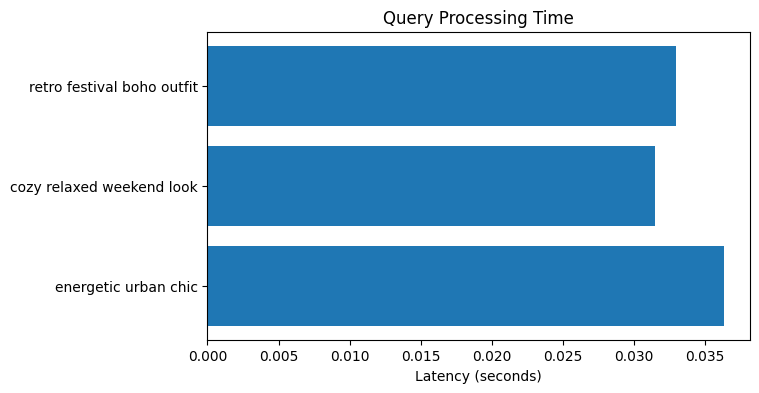


 Evaluation Summary:
                        Query  Avg_Similarity Quality  Latency_sec
0        energetic urban chic        0.354195    weak     0.036370
1   cozy relaxed weekend look        0.496043    weak     0.031491
2  retro festival boho outfit        0.417211    weak     0.032959


In [8]:
plt.figure(figsize=(7,4))
plt.barh(range(len(queries)), latency)
plt.yticks(range(len(queries)), queries)
plt.xlabel("Latency (seconds)")
plt.title("Query Processing Time")
plt.show()

metrics = pd.DataFrame({
    "Query": queries,
    "Avg_Similarity": [r["similarity"].mean() for _, r in results],
    "Quality": quality,
    "Latency_sec": latency
})

print("\n Evaluation Summary:")
print(metrics)

# === Reflection / Improvements ===

In [9]:
print("\nReflection & Next Steps:")
print("""
• Integrate real OpenAI embeddings (text-embedding-ada-002) once billing is active.
• Push embeddings to a vector DB (Pinecone / FAISS) for scalable retrieval.
• Add hybrid scoring (semantic + tag overlap).
• Handle no-match gracefully with fallback descriptive generation.
• Optimize batch embedding for latency in production.
""")


Reflection & Next Steps:

• Integrate real OpenAI embeddings (text-embedding-ada-002) once billing is active.
• Push embeddings to a vector DB (Pinecone / FAISS) for scalable retrieval.
• Add hybrid scoring (semantic + tag overlap).
• Handle no-match gracefully with fallback descriptive generation.
• Optimize batch embedding for latency in production.



# ===  Intro Paragraph (Why AI at Nexora?) ===

In [10]:
print("\n Why AI at Nexora:")
print("""
Nexora uses AI to make personalization feel human. The Vibe Matcher prototype shows how semantic embeddings can capture emotional intent and match it to real products.
 It transforms subjective “vibes” into objective similarity scores, creating a smarter bridge between what people feel and what they discover.
""")


 Why AI at Nexora:

Nexora uses AI to make personalization feel human. The Vibe Matcher prototype shows how semantic embeddings can capture emotional intent and match it to real products.
 It transforms subjective “vibes” into objective similarity scores, creating a smarter bridge between what people feel and what they discover.

